### Housing Price Prediction(Using linear regression)

In [55]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn import metrics

In [56]:
# Upload data and remove empty rows

df = pd.read_csv(r'C:\Users\91988\Downloads\houses.csv')
df = df.dropna()

In [57]:
# The dataset

print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [58]:
# All params and their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [59]:
# Few stat parameters

np.round(df.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0
mean,551963.0,3.0,2.0,2139.0,14853.0,2.0,0.0,0.0,3.0,1827.0,312.0,1971.0,809.0
std,563835.0,1.0,1.0,963.0,35884.0,1.0,0.0,1.0,1.0,862.0,464.0,30.0,979.0
min,0.0,0.0,0.0,370.0,638.0,1.0,0.0,0.0,1.0,370.0,0.0,1900.0,0.0
25%,322875.0,3.0,2.0,1460.0,5001.0,1.0,0.0,0.0,3.0,1190.0,0.0,1951.0,0.0
50%,460943.0,3.0,2.0,1980.0,7683.0,2.0,0.0,0.0,3.0,1590.0,0.0,1976.0,0.0
75%,654962.0,4.0,2.0,2620.0,11001.0,2.0,0.0,0.0,4.0,2300.0,610.0,1997.0,1999.0
max,26590000.0,9.0,8.0,13540.0,1074218.0,4.0,1.0,4.0,5.0,9410.0,4820.0,2014.0,2014.0


<Axes: >

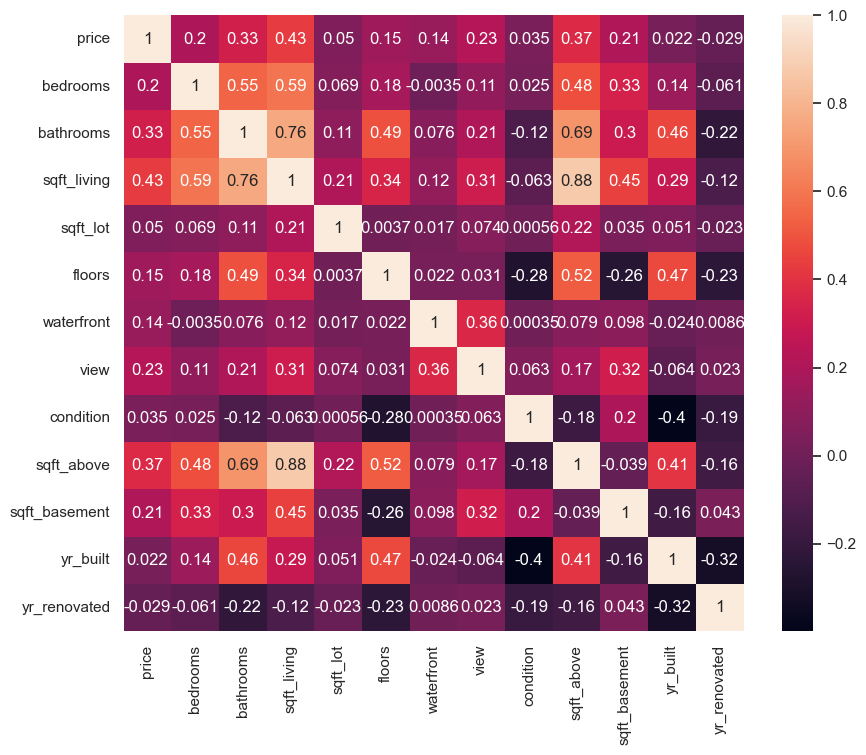

In [60]:
# Correlation analysis

plt.figure(figsize = (10,8))
numdf = df.select_dtypes(include = 'number')
sns.heatmap(numdf.corr(), annot = True)

In [61]:
# Choose columns to train model on 

x = df[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'sqft_above', 'sqft_basement']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [62]:
# Model definition and training

rgr = LinearRegression()
rgr.fit(x_train, y_train)
print(rgr.score(x_test, y_test))

0.45697363482389597


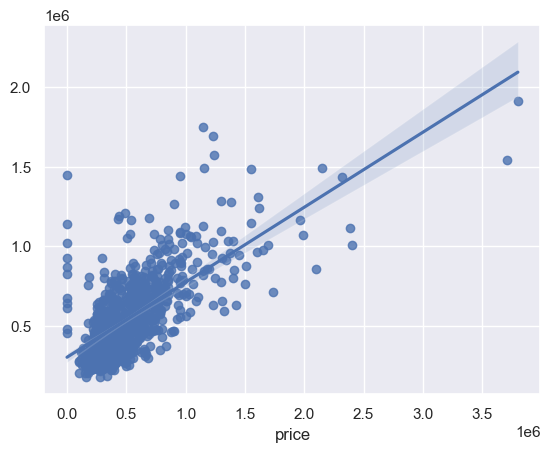

In [63]:
# Testing model 

pred = rgr.predict(x_test)

sns.regplot(x = y_test, y = pred)
xlabel = 'Real Price'
ylabel = 'Prediction'


### The model predicts lower than the actual price

In [67]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Root Mean Squared Error: 257339.00484864757


In [69]:
# Add few more columns to see if it fits better 

x = df[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'sqft_above', 'sqft_basement', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [70]:
# Model definition and training

rgr = LinearRegression()
rgr.fit(x_train, y_train)
print(rgr.score(x_test, y_test))

0.4163680482053135


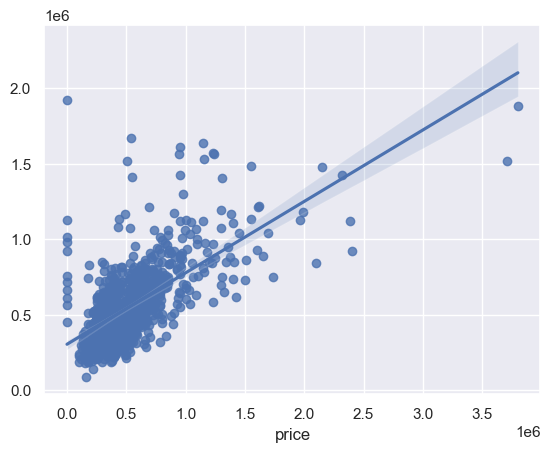

In [79]:
# Testing model 

pred = rgr.predict(x_test)

sns.regplot(x = y_test, y = pred)
xlabel = 'Real Price'
ylabel = 'Prediction'


### The model scores lower and the predictions are a little worse

## The initial model is close to the optimal case for linear regression which performs a little worse compared to non linear models